<a href="https://colab.research.google.com/github/davidton4/FDA_API-medical_device_EDA/blob/main/FDA_API_Medical_Device_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
# import libraries
import pandas as pd
import numpy as np
import requests as r
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import plotly.express as px

In [60]:
# API key to access OpenFDA API
API_KEY = '9BqN9PjHHf5xGo6bjYjNzTlXhfydEdbYrTd5ljlT'

## **Premarket Approval (PMA) API**

**1. Top 10 companies with most PMA submissions**

In [61]:
# Empty list
data1 = []

# Request API for data on all PMA submissions
url = 'https://api.fda.gov/device/pma.json?api_key=' + API_KEY + '&count=applicant.exact&limit=10'
response = r.get(url).json()

# Parse through JSON data
for datapoint in response['results']:
    PMA_submissions = datapoint['count']
    Company = datapoint['term']
    data1.append([Company, PMA_submissions])

# Save data into pandas dataframe
df_company_pma_sub = pd.DataFrame.from_records(data1, index = None, columns = ['Company', 'PMA submissions'])
df_company_pma_sub


,Company,PMA submissions
0,MEDTRONIC Inc.,3597
1,Boston Scientific Corp.,3105
2,Abbott Medical,2563
3,MEDTRONIC CARDIAC RHYTHM DISEASE MANAGEMENT,2289
4,BOSTON SCIENTIFIC,1577
5,"Medtronic, Inc.",1088
6,MEDTRONIC NEUROMODULATION,1056
7,"EDWARDS LIFESCIENCES, LLC.",828
8,"BIOTRONIK, INC.",769
9,"ADVANCED MEDICAL OPTICS, INC.",661


In [62]:
# Data Visulaization: Horizontal Bar Chart
fig = px.bar(df_company_pma_sub, x = "PMA submissions", y = "Company", orientation = 'h',
             text = 'PMA submissions', color = "PMA submissions", color_continuous_scale = "oryel")

fig.update_layout(yaxis={'categoryorder':'total ascending'},
                  title={'text': "Companies with most PMA Submissions",
                        'xanchor': 'center',
                        'yanchor': 'top',
                        'y':0.95 ,
                        'x':0.5,})
fig.show()

**2. Top 10 medical specialties with most PMA submissions**

In [63]:
# Empty list
data2 = []

# Request API for PMA submission data 
url = 'https://api.fda.gov/device/pma.json?api_key=' + API_KEY + '&count=advisory_committee_description.exact&limit=10'
response = r.get(url).json()

# Parse through JSON data
for datapoint in response['results']:
    PMA_submissions = datapoint['count']
    medical_specialty = datapoint['term']
    data2.append([medical_specialty, PMA_submissions])

# Save data into pandas dataframe
df_specialty_pma_sub = pd.DataFrame.from_records(data2, index = None, columns = ['Medical Specialty','PMA Submissions'])
df_specialty_pma_sub

,Medical Specialty,PMA Submissions
0,Cardiovascular,23685
1,Ophthalmic,5942
2,Microbiology,2551
3,"General, Plastic Surgery",2493
4,Neurology,2187
5,"Gastroenterology, Urology",2063
6,Orthopedic,2015
7,Clinical Chemistry,1053
8,"Ear, Nose, Throat",859
9,Pathology,814


In [64]:
# Data Visulaization: Horizontal Bar Chart

fig = px.bar(df_specialty_pma_sub, x = "PMA Submissions", y = "Medical Specialty", orientation = 'h',
             text = 'PMA Submissions', color = "PMA Submissions", color_continuous_scale = "emrld")

fig.update_layout(yaxis={'categoryorder':'total ascending'},
                  title={'text': "PMA Submissions by Medical Specialty",
                        'xanchor': 'center',
                        'yanchor': 'top',
                        'y':0.95 ,
                        'x':0.5,})
fig.show()

## **Device Registration & Listings API**

**3. Number of medical device establishments/facilities per state**

In [65]:
# Empty list
data3 = []

# Request API for data on all FDA registered medical device establishments
url = 'https://api.fda.gov/device/registrationlisting.json?api_key=' + API_KEY + '&search=registration.iso_country_code:US&count=registration.state_code&limit=52'
response = r.get(url).json()

# Parse through JSON data
for datapoint in response['results']:
    state = datapoint['term']
    establishments = datapoint['count']
    data3.append([state, establishments])

# Save data into pandas dataframe
df_registrations = pd.DataFrame.from_records(data3, index = None, columns = ['state','establishments'])

In [66]:
# Data Visulaization: Interactive Choropleth Map

# Create choropleth map from plotly.express
fig = px.choropleth(df_registrations,
                    locations = 'state',
                    color = 'establishments',
                    color_continuous_scale = 'teal',
                    locationmode='USA-states',
                    labels={'establishments':'Number of Establishments'},
                    scope='usa')

# Add title
fig.update_layout(
    title={'text':'Number of Medical Device Establishments by State<br>(Hover for Count)',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.45})
fig.show()

## **Device Classification API**

**4. Percentage of FDA approved medical devices by class**

In [67]:
# Request API for classficiation data of each FDA approved medical device
# 7 API requests required for 6222 total devices because each API call is limited to 1000 records

# Empty list
data4 = []

# API Call for Device 0-999
url = 'https://api.fda.gov/device/classification.json?api_key=' + API_KEY + '&search=device_class:(1+OR+2+OR+3)&limit=1000'
response = r.get(url).json()

# Parse through JSON data
for datapoint in response['results']:
    device_class = datapoint['device_class']
    device_name = datapoint['device_name']
    data4.append([device_name, device_class])

# API Call for Device 1000-1999
url = 'https://api.fda.gov/device/classification.json?api_key=' + API_KEY + '&search=device_class:(1+OR+2+OR+3)&skip=1000&limit=1000'
response = r.get(url).json()

# Parse through JSON data
for datapoint in response['results']:
    device_class = datapoint['device_class']
    device_name = datapoint['device_name']
    data4.append([device_name, device_class])

# API Call for Device 2000-2999
url = 'https://api.fda.gov/device/classification.json?api_key=' + API_KEY + '&search=device_class:(1+OR+2+OR+3)&skip=2000&limit=1000'
response = r.get(url).json()

# Parse through JSON data
for datapoint in response['results']:
    device_class = datapoint['device_class']
    device_name = datapoint['device_name']
    data4.append([device_name, device_class])

# API Call for Device 3000-3999
url = 'https://api.fda.gov/device/classification.json?api_key=' + API_KEY + '&search=device_class:(1+OR+2+OR+3)&skip=3000&limit=1000'
response = r.get(url).json()

# Parse through JSON data
for datapoint in response['results']:
    device_class = datapoint['device_class']
    device_name = datapoint['device_name']
    data4.append([device_name, device_class])

# API Call for Device 4000-4999
url = 'https://api.fda.gov/device/classification.json?api_key=' + API_KEY + '&search=device_class:(1+OR+2+OR+3)&skip=4000&limit=1000'
response = r.get(url).json()

# Parse through JSON data
for datapoint in response['results']:
    device_class = datapoint['device_class']
    device_name = datapoint['device_name']
    data4.append([device_name, device_class])

# API Call for Device 5000-5999
url = 'https://api.fda.gov/device/classification.json?api_key=' + API_KEY + '&search=device_class:(1+OR+2+OR+3)&skip=5000&limit=1000'
response = r.get(url).json()

# Parse through JSON data
for datapoint in response['results']:
    device_class = datapoint['device_class']
    device_name = datapoint['device_name']
    data4.append([device_name, device_class])

# API Call for Device 6000-6730
url = 'https://api.fda.gov/device/classification.json?api_key=' + API_KEY + '&search=device_class:(1+OR+2+OR+3)&skip=6000&limit=1000'
response = r.get(url).json()

# Parse through JSON data
for datapoint in response['results']:
    device_class = datapoint['device_class']
    device_name = datapoint['device_name']
    data4.append([device_name, device_class])

In [68]:
# Save data into pandas dataframe
df_device_class = pd.DataFrame.from_records(data4, index = None, columns = ['device_name','device_class'])

In [69]:
# Group dataframe by device class
df_class_count = df_device_class.groupby('device_class').count()

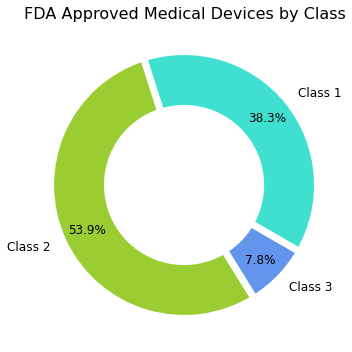

In [70]:
# Data Visulaization: Donut Chart

my_labels = 'Class 1','Class 2','Class 3'
colors = ['turquoise', 'yellowgreen', 'cornflowerblue']

# Create pie chart
plt.pie(np.array(df_class_count).ravel(), labels = my_labels, colors = colors, textprops={'fontsize': 12}, autopct='%1.1f%%',
        startangle = 330, pctdistance=0.8, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })

plt.title('FDA Approved Medical Devices by Class', fontsize = 16)

# Draw circle in center to form donut chart
circle_center = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(circle_center)

# Increase Size of Plot
fig.set_size_inches(5,5)
plt.tight_layout()
plt.axis('equal')
plt.show()

## **Device Recall API**

**5. Top 10 causes for medical device recall in the last 10 years**

In [71]:
# Empty list
data5 = []

# Request API for data on all medical device recalls within last 10 years
url = 'https://api.fda.gov/device/recall.json?api_key=' + API_KEY + '&search=event_date_created:[20120101+TO+20220101]&count=root_cause_description.exact&limit=10'
response = r.get(url).json()

# Parse through JSON data
for datapoint in response['results']:
    recall_count = datapoint['count']
    root_cause = datapoint['term']
    data5.append([root_cause, recall_count])

# Save data into pandas dataframe
df_recall_cause = pd.DataFrame.from_records(data5, index = None, columns = ['root_cause','recall_count'])
df_recall_cause

,root_cause,recall_count
0,Under Investigation by firm,2543
1,Device Design,1811
2,Process control,1603
3,Nonconforming Material/Component,1283
4,Software design,939
5,Other,407
6,Packaging process control,359
7,Employee error,352
8,Unknown/Undetermined by firm,348
9,Component design/selection,284


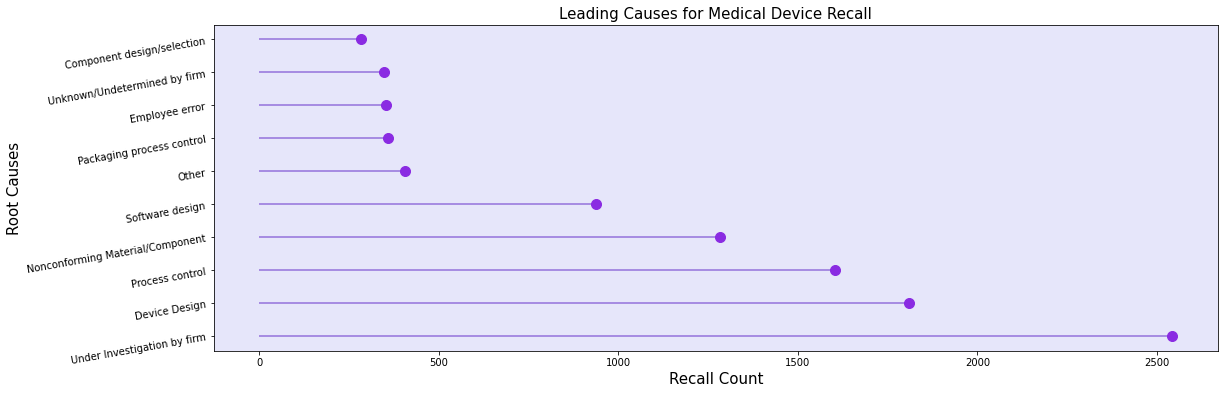

In [72]:
# Data Visulaization: Lollipop Chart

plt.figure(figsize=(18, 6))

# Plot horizontal line for each root cause from 0 to recall_count
plt.hlines(y = df_recall_cause['root_cause'], xmin = 0, xmax = df_recall_cause['recall_count'], color = 'mediumpurple')

# Change background color to lavender
plt.rcParams['axes.facecolor'] = 'lavender'

# Create plot 
plt.plot(df_recall_cause['recall_count'], df_recall_cause['root_cause'], "o", color = 'blueviolet', markersize = 10)
plt.yticks(rotation = 10)
plt.title('Leading Causes for Medical Device Recall', fontsize = 15)
plt.xlabel('Recall Count', fontsize = 15)
plt.ylabel('Root Causes', fontsize = 15)
plt.show()


## **Adverse Events API**

**6. Types of adverse events from medical devices in the last 10 years**

In [73]:
# Empty list
data6 = []

# Request API for data on all adverse events within last 10 years 
url = 'https://api.fda.gov/device/event.json?api_key=' + API_KEY + '&search=date_received:[20120101+TO+20220101]&count=event_type.exact'
response = r.get(url).json()

# Parse through JSON data
for datapoint in response['results']:
    event_count = datapoint['count']
    event_type = datapoint['term']
    data6.append([event_type, event_count])

# Save data into pandas dataframe
df_event_count = pd.DataFrame.from_records(data6, index = None, columns = ['event_type','event_count'])

# Remove last row in dataframe because event_type for index 5 is empty
df_event_count = df_event_count.drop(5)
df_event_count

,event_type,event_count
0,Malfunction,6635486
1,Injury,3839442
2,Death,120721
3,No answer provided,34163
4,Other,17186


In [74]:
# Data Visulaization: Bar Chart

fig = px.bar(df_event_count, x = "event_type", y = "event_count", text = 'event_count', color_discrete_sequence = ['indianred']*len(df_event_count),
             labels = {"event_type": "Type of Adverse Event",
                       "event_count": "Number of Reports"})
# Add title
fig.update_layout(
        title={
        'text': "Types of Adverse Events Reported from 2012-2022",
        'xanchor': 'center',
        'yanchor': 'top',
        'y':0.95 ,
        'x':0.5,})

fig.show()